#OPENING
Team 4: Joseph Pushnam, Elham Mirza, Andy Pan, Chris Joyce
(Each team member had equal contributions in each sections in refining and discussing the items presented below)

##Business Statement & Problem:
Swire Coca-Cola, franchise owner of Coca-Cola bottling services, faces an issue with identifying customers, brands, and clients in their book of business to whitelist for White Truck services within their Western USA market. Businesses whitelisted for Red Truck services take up a lot of resources. Thus, we want to identify “who to and who not to whitelist into the White Truck services?”

#Additional Items:

This notebook consistes of materials to spearhead the Swire Coca-Cola project to reduce cost per delivery by identifying customer profiles that may be whitelisted for ARTM or Red Truck services.

Before initiating the EDA we will first data wrangle 3 datasets by grouping them up through CIDs. The three are as follows:
- 'customer_address_and_zip_mapping'
- 'customer_profile'
- 'transactional_data'
The 4th dataset does not have any IDs to be used as to be looped back into the aggregate.
- 'delivery_cost_data'

After which we will initiate the EDA. The EDA will consist of the following:
- Elbow Method plot
- K means

Questions to answer to help answer the business statement and problem:
1. What thresholds should be set for red truck white listing services?
2. What features/characteristics determine customer profiles/grouping?
3. What are some cost effective measures which can be taken?
4. Who can be enabled for red truck/white truck white listing?
5. Who is growing and diminishing in growth?
6. Do chain customers outperform based on specific criteria or chracteristics?
7. Do moms & pops customers experience growth? How much?
8. When should customers move between red and white truck white listing?
9. When do seasonal trends spike and create noise in customer performance? How can this be reduced to track actual performance of customers based on control demand and purchase power?
10. Where are the least or most profitable customers located?

## Discussion on missing data:
Although there are missing Primary Group Numbers this was indicated by Swire Coca Cola as an indication of having chains or no chains.

The main concern is seen when right joining from customer profiles to transactions. Here we can see that not all customers are making purchases. The amount of data which is missing is around ~0.5% (which is highly insignificant) and may indicate an old customer which is no longer in business or not ordering any Coca Cola products.

## Results section is at the end located on the "Part III: Exploratory Data Analysis (EDA) Summary" section

In [ ]:
# prompt: Connect to Google Drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prompt: Load all the csv and xlsx files here from this path "/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Swire Coca Cola"
# And save them into their respective variable names

import pandas as pd
import os

# Define the directory path
directory_path = "/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Swire Coca Cola"

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        # Construct the full file path
        filepath = os.path.join(directory_path, filename)

        # Extract the variable name from the filename (without extension)
        var_name = filename[:-4]  # Remove the ".csv" extension

        # Load the CSV file into a DataFrame
        try:
            globals()[var_name] = pd.read_csv(filepath)
            print(f"Loaded CSV file '{filename}' into variable '{var_name}'")
        except pd.errors.ParserError as e:
            print(f"Error parsing CSV file '{filename}': {e}")
        except Exception as e:
            print(f"An error occurred while loading '{filename}': {e}")


    elif filename.endswith(".xlsx"):
        filepath = os.path.join(directory_path, filename)
        var_name = filename[:-5]  # Remove the ".xlsx" extension
        try:
            globals()[var_name] = pd.read_excel(filepath)
            print(f"Loaded Excel file '{filename}' into variable '{var_name}'")
        except Exception as e:
            print(f"An error occurred while loading '{filename}': {e}")


Loaded CSV file 'customer_address_and_zip_mapping.csv' into variable 'customer_address_and_zip_mapping'
Loaded CSV file 'customer_profile.csv' into variable 'customer_profile'
Loaded CSV file 'transactional_data.csv' into variable 'transactional_data'
Loaded Excel file 'delivery_cost_data.xlsx' into variable 'delivery_cost_data'
Loaded CSV file 'merged_data.csv' into variable 'merged_data'


In [ ]:
print(customer_address_and_zip_mapping.head())

     zip                                       full address
0  71018  71018,Cotton Valley,Louisiana,LA,Webster,119,3...
1  71021  71021,Cullen,Louisiana,LA,Webster,119,32.9721,...
2  71023  71023,Doyline,Louisiana,LA,Webster,119,32.49,-...
3  71024  71024,Dubberly,Louisiana,LA,Webster,119,32.519...
4  71039  71039,Heflin,Louisiana,LA,Webster,119,32.447,-...


In [ ]:
print(customer_profile.head())

   CUSTOMER_NUMBER  PRIMARY_GROUP_NUMBER FREQUENT_ORDER_TYPE  \
0        501556470                 376.0       MYCOKE LEGACY   
1        501363456                   NaN           SALES REP   
2        600075150                2158.0           SALES REP   
3        500823056                2183.0               OTHER   
4        600082383                1892.0           SALES REP   

  FIRST_DELIVERY_DATE ON_BOARDING_DATE COLD_DRINK_CHANNEL  \
0            1/2/2024        8/28/2023             DINING   
1           4/14/2022        3/22/2022             DINING   
2            3/4/2016        3/22/2012             DINING   
3            2/6/2019       11/23/2018             DINING   
4            3/4/2016        8/31/2010      PUBLIC SECTOR   

                  TRADE_CHANNEL    SUB_TRADE_CHANNEL  LOCAL_MARKET_PARTNER  \
0            FAST CASUAL DINING      PIZZA FAST FOOD                  True   
1          COMPREHENSIVE DINING           FSR - MISC                  True   
2            F

In [ ]:
print(transactional_data.head())

  TRANSACTION_DATE  WEEK  YEAR  CUSTOMER_NUMBER     ORDER_TYPE  ORDERED_CASES  \
0         1/5/2023     1  2023        501202893  MYCOKE LEGACY            1.0   
1         1/6/2023     1  2023        500264574  MYCOKE LEGACY           12.5   
2         1/9/2023     2  2023        501174701  MYCOKE LEGACY            2.0   
3        1/11/2023     2  2023        600586532      SALES REP           18.0   
4        1/17/2023     3  2023        501014325      SALES REP           29.0   

   LOADED_CASES  DELIVERED_CASES  ORDERED_GALLONS  LOADED_GALLONS  \
0           1.0              1.0             90.0            90.0   
1          12.5             12.5              0.0             0.0   
2           2.0              2.0              0.0             0.0   
3          16.0             16.0              2.5             2.5   
4          29.0             29.0              0.0             0.0   

   DELIVERED_GALLONS  
0               90.0  
1                0.0  
2                0.0  
3     

In [ ]:
print(delivery_cost_data.head())

  Cold Drink Channel  Vol Range     Applicable To  Median Delivery Cost  \
0          WORKPLACE    0 - 149  Bottles and Cans              8.064950   
1          WORKPLACE  150 - 299  Bottles and Cans              4.165646   
2          WORKPLACE  300 - 449  Bottles and Cans              2.991558   
3          WORKPLACE  450 - 599  Bottles and Cans              2.524222   
4          WORKPLACE  600 - 749  Bottles and Cans              2.056886   

  Cost Type  
0  Per Case  
1  Per Case  
2  Per Case  
3  Per Case  
4  Per Case  


In [ ]:
import pandas as pd

# Load your datasets (assuming they're already loaded as DataFrames)
# customer_profile, transactional_data, customer_address_and_zip_mapping, delivery_cost_data

# Merge customer profile with transactional data on CUSTOMER_NUMBER
merged_data = pd.merge(transactional_data, customer_profile, on="CUSTOMER_NUMBER", how="left")

# Merge with customer address mapping on ZIP_CODE
merged_data = pd.merge(merged_data, customer_address_and_zip_mapping, left_on="ZIP_CODE", right_on="zip", how="left")

In [ ]:
# Display the first few rows of the merged dataset
print(merged_data.head())

  TRANSACTION_DATE  WEEK  YEAR  CUSTOMER_NUMBER     ORDER_TYPE  ORDERED_CASES  \
0         1/5/2023     1  2023        501202893  MYCOKE LEGACY            1.0   
1         1/6/2023     1  2023        500264574  MYCOKE LEGACY           12.5   
2         1/9/2023     2  2023        501174701  MYCOKE LEGACY            2.0   
3        1/11/2023     2  2023        600586532      SALES REP           18.0   
4        1/17/2023     3  2023        501014325      SALES REP           29.0   

   LOADED_CASES  DELIVERED_CASES  ORDERED_GALLONS  LOADED_GALLONS  ...  \
0           1.0              1.0             90.0            90.0  ...   
1          12.5             12.5              0.0             0.0  ...   
2           2.0              2.0              0.0             0.0  ...   
3          16.0             16.0              2.5             2.5  ...   
4          29.0             29.0              0.0             0.0  ...   

   FIRST_DELIVERY_DATE  ON_BOARDING_DATE COLD_DRINK_CHANNEL  \
0    

In [ ]:
# Import display function correctly
from IPython.display import display

# Display the first few rows of the merged dataset
display(merged_data.head())

,TRANSACTION_DATE,WEEK,YEAR,CUSTOMER_NUMBER,ORDER_TYPE,ORDERED_CASES,LOADED_CASES,DELIVERED_CASES,ORDERED_GALLONS,LOADED_GALLONS,...,FIRST_DELIVERY_DATE,ON_BOARDING_DATE,COLD_DRINK_CHANNEL,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address
0,1/5/2023,1,2023,501202893,MYCOKE LEGACY,1.0,1.0,1.0,90.0,90.0,...,5/7/2021,4/2/2021,DINING,COMPREHENSIVE DINING,FSR - MISC,True,True,66955,66955,"66955,Mahaska,Kansas,KS,Washington,201,39.9845..."
1,1/6/2023,1,2023,500264574,MYCOKE LEGACY,12.5,12.5,12.5,0.0,0.0,...,3/23/2018,12/8/2015,WELLNESS,HEALTHCARE,OTHER HEALTHCARE,True,False,41603,41603,"41603,Banner,Kentucky,KY,Floyd,71,37.5707,-82...."
2,1/9/2023,2,2023,501174701,MYCOKE LEGACY,2.0,2.0,2.0,0.0,0.0,...,4/12/2021,1/26/2021,DINING,FAST CASUAL DINING,OTHER FAST FOOD,True,True,1824,1824,"01824,Chelmsford,Massachusetts,MA,Middlesex,17..."
3,1/11/2023,2,2023,600586532,SALES REP,18.0,16.0,16.0,2.5,2.5,...,5/5/2017,2/28/1997,BULK TRADE,GENERAL,COMPREHENSIVE PROVIDER,False,False,1337,1337,"01337,Bernardston,Massachusetts,MA,Franklin,11..."
4,1/17/2023,3,2023,501014325,SALES REP,29.0,29.0,29.0,0.0,0.0,...,10/29/2019,10/25/2019,GOODS,GENERAL RETAILER,OTHER GENERAL RETAIL,True,False,67473,67473,"67473,Osborne,Kansas,KS,Osborne,141,39.4194,-9..."


## Adding necessary fields
Months were not added into the dataset. We also need a way to classify groups which have and do not have PRIMARY_GROUP_NUMBER's thus a boolean feature is added.

In [ ]:
# Convert 'TRANSACTION_DATE' column to datetime objects
merged_data['TRANSACTION_DATE'] = pd.to_datetime(merged_data['TRANSACTION_DATE'])

# Extract the month from the 'TRANSACTION_DATE' column
merged_data['Month'] = merged_data['TRANSACTION_DATE'].dt.month

merged_data['Has Primary Group Number?'] = merged_data['PRIMARY_GROUP_NUMBER'].apply(lambda x: 0 if x == "" else (1 if x != "" else 0))


In [ ]:
# Display the first few rows to verify
display(merged_data.head())

,TRANSACTION_DATE,WEEK,YEAR,CUSTOMER_NUMBER,ORDER_TYPE,ORDERED_CASES,LOADED_CASES,DELIVERED_CASES,ORDERED_GALLONS,LOADED_GALLONS,...,COLD_DRINK_CHANNEL,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address,Month,Has Primary Group Number?
0,2023-01-05,1,2023,501202893,MYCOKE LEGACY,1.0,1.0,1.0,90.0,90.0,...,DINING,COMPREHENSIVE DINING,FSR - MISC,True,True,66955,66955,"66955,Mahaska,Kansas,KS,Washington,201,39.9845...",1,1
1,2023-01-06,1,2023,500264574,MYCOKE LEGACY,12.5,12.5,12.5,0.0,0.0,...,WELLNESS,HEALTHCARE,OTHER HEALTHCARE,True,False,41603,41603,"41603,Banner,Kentucky,KY,Floyd,71,37.5707,-82....",1,1
2,2023-01-09,2,2023,501174701,MYCOKE LEGACY,2.0,2.0,2.0,0.0,0.0,...,DINING,FAST CASUAL DINING,OTHER FAST FOOD,True,True,1824,1824,"01824,Chelmsford,Massachusetts,MA,Middlesex,17...",1,1
3,2023-01-11,2,2023,600586532,SALES REP,18.0,16.0,16.0,2.5,2.5,...,BULK TRADE,GENERAL,COMPREHENSIVE PROVIDER,False,False,1337,1337,"01337,Bernardston,Massachusetts,MA,Franklin,11...",1,1
4,2023-01-17,3,2023,501014325,SALES REP,29.0,29.0,29.0,0.0,0.0,...,GOODS,GENERAL RETAILER,OTHER GENERAL RETAIL,True,False,67473,67473,"67473,Osborne,Kansas,KS,Osborne,141,39.4194,-9...",1,1


##Gowth Indicators
Adding in indicators which allow us to track growth. This is a disruption of numbers moving across Ordered to Loaded and Loaded to Delivered in **cases** and **gallons** respectively.

In [ ]:
# Creating difference between Ordered, Loaded, and Delivered and storing this into columns for both Gallons and Cases
merged_data['Difference_Ordered_Loaded_Gallons'] = merged_data['ORDERED_GALLONS'] - merged_data['LOADED_GALLONS']
merged_data['Difference_Loaded_Delivered_Gallons'] = merged_data['DELIVERED_GALLONS'] - merged_data['LOADED_GALLONS']
merged_data['Difference_Ordered_Loaded_Cases'] = merged_data['LOADED_CASES']
merged_data['Difference_Loaded_Delivered_Cases'] = merged_data['DELIVERED_CASES'] - merged_data['LOADED_CASES']

# If the Difference_Ordered_Loaded_Gallons is < 0 then "Growth", if > 0 "Diminished Growth", if = 0 then "Neutral"
merged_data['Growth_Ordered_Loaded_Gallons'] = merged_data['Difference_Ordered_Loaded_Gallons'].apply(lambda x: 'Growth' if x < 0 else ('Diminished Growth' if x > 0 else 'Neutral'))
merged_data['Growth_Loaded_Delivered_Gallons'] = merged_data['Difference_Loaded_Delivered_Gallons'].apply(lambda x: 'Growth' if x < 0 else ('Diminished Growth' if x > 0 else 'Neutral'))

print(merged_data['Difference_Ordered_Loaded_Gallons'].min())
display(merged_data)

-750.0


,TRANSACTION_DATE,WEEK,YEAR,CUSTOMER_NUMBER,ORDER_TYPE,ORDERED_CASES,LOADED_CASES,DELIVERED_CASES,ORDERED_GALLONS,LOADED_GALLONS,...,zip,full address,Month,Has Primary Group Number?,Difference_Ordered_Loaded_Gallons,Difference_Loaded_Delivered_Gallons,Difference_Ordered_Loaded_Cases,Difference_Loaded_Delivered_Cases,Growth_Ordered_Loaded_Gallons,Growth_Loaded_Delivered_Gallons
0,2023-01-05,1,2023,501202893,MYCOKE LEGACY,1.0,1.0,1.0,90.0,90.0,...,66955,"66955,Mahaska,Kansas,KS,Washington,201,39.9845...",1,1,0.0,0.0,1.0,0.0,Neutral,Neutral
1,2023-01-06,1,2023,500264574,MYCOKE LEGACY,12.5,12.5,12.5,0.0,0.0,...,41603,"41603,Banner,Kentucky,KY,Floyd,71,37.5707,-82....",1,1,0.0,0.0,12.5,0.0,Neutral,Neutral
2,2023-01-09,2,2023,501174701,MYCOKE LEGACY,2.0,2.0,2.0,0.0,0.0,...,1824,"01824,Chelmsford,Massachusetts,MA,Middlesex,17...",1,1,0.0,0.0,2.0,0.0,Neutral,Neutral
3,2023-01-11,2,2023,600586532,SALES REP,18.0,16.0,16.0,2.5,2.5,...,1337,"01337,Bernardston,Massachusetts,MA,Franklin,11...",1,1,0.0,0.0,16.0,0.0,Neutral,Neutral
4,2023-01-17,3,2023,501014325,SALES REP,29.0,29.0,29.0,0.0,0.0,...,67473,"67473,Osborne,Kansas,KS,Osborne,141,39.4194,-9...",1,1,0.0,0.0,29.0,0.0,Neutral,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045535,2024-12-13,50,2024,501075592,MYCOKE360,12.0,12.0,12.0,0.0,0.0,...,67621,"67621,Agra,Kansas,KS,Phillips,147,39.8037,-99....",12,1,0.0,0.0,12.0,0.0,Neutral,Neutral
1045536,2024-12-13,50,2024,600249707,CALL CENTER,0.0,0.0,0.0,40.0,40.0,...,67560,"67560,Ness City,Kansas,KS,Ness,135,38.4388,-99...",12,1,0.0,0.0,0.0,0.0,Neutral,Neutral
1045537,2024-12-17,51,2024,500463314,CALL CENTER,11.0,10.0,10.0,0.0,0.0,...,67344,"67344,Elk City,Kansas,KS,Montgomery,125,37.314...",12,1,0.0,0.0,10.0,0.0,Neutral,Neutral
1045538,2024-12-19,51,2024,600079044,EDI,33.0,33.0,33.0,0.0,0.0,...,66407,"66407,Belvue,Kansas,KS,Pottawatomie,149,39.227...",12,1,0.0,0.0,33.0,0.0,Neutral,Neutral


## Exploring the growth count by overall transactions and unique CIDs.

The goal in this calculation is to calculate how many companies are experiencing growth. We may consider even the acceleration of growth of some companies to use for predictive analytics.

In [ ]:
print("Total transactions which indicate growth:")
display(merged_data['Growth_Ordered_Loaded_Gallons'].value_counts())

# Group by 'Growth_Ordered_Loaded_Gallons' and count unique customer IDs
growth_counts = merged_data.groupby('Growth_Ordered_Loaded_Gallons')['CUSTOMER_NUMBER'].nunique()

# Display the results
print("Growth Counts of Unique Customers:")
display(growth_counts)


Total transactions which indicate growth:


,count
Growth_Ordered_Loaded_Gallons,
Neutral,987612
Diminished Growth,55554
Growth,2374


Growth Counts of Unique Customers:


,CUSTOMER_NUMBER
Growth_Ordered_Loaded_Gallons,
Diminished Growth,9761
Growth,1476
Neutral,30254


In [ ]:
print(merged_data)

        TRANSACTION_DATE  WEEK  YEAR  CUSTOMER_NUMBER     ORDER_TYPE  \
0             2023-01-05     1  2023        501202893  MYCOKE LEGACY   
1             2023-01-06     1  2023        500264574  MYCOKE LEGACY   
2             2023-01-09     2  2023        501174701  MYCOKE LEGACY   
3             2023-01-11     2  2023        600586532      SALES REP   
4             2023-01-17     3  2023        501014325      SALES REP   
...                  ...   ...   ...              ...            ...   
1045535       2024-12-13    50  2024        501075592      MYCOKE360   
1045536       2024-12-13    50  2024        600249707    CALL CENTER   
1045537       2024-12-17    51  2024        500463314    CALL CENTER   
1045538       2024-12-19    51  2024        600079044            EDI   
1045539       2024-12-20    51  2024        500585826      MYCOKE360   

         ORDERED_CASES  LOADED_CASES  DELIVERED_CASES  ORDERED_GALLONS  \
0                  1.0           1.0              1.0        

## EXploring Null values in each column

Thus far we discovered Null values in ORDER_TYPE and PRIMARY_GROUP_NUMBER


In [ ]:
# Count the number of missing (NA) values in each column of the merged dataset
na_counts = merged_data.isna().sum()

# Convert to a DataFrame for better readability
na_counts_df = na_counts.to_frame(name="Missing Values")

# Display the missing values count
print(na_counts_df)

# Alternatively, for better visualization in Google Colab:
import IPython.display as display
display.display(na_counts_df)

                                     Missing Values
TRANSACTION_DATE                                  0
WEEK                                              0
YEAR                                              0
CUSTOMER_NUMBER                                   0
ORDER_TYPE                                    11131
ORDERED_CASES                                     0
LOADED_CASES                                      0
DELIVERED_CASES                                   0
ORDERED_GALLONS                                   0
LOADED_GALLONS                                    0
DELIVERED_GALLONS                                 0
PRIMARY_GROUP_NUMBER                         490895
FREQUENT_ORDER_TYPE                               0
FIRST_DELIVERY_DATE                               0
ON_BOARDING_DATE                                  0
COLD_DRINK_CHANNEL                                0
TRADE_CHANNEL                                     0
SUB_TRADE_CHANNEL                                 0
LOCAL_MARKET

,Missing Values
TRANSACTION_DATE,0
WEEK,0
YEAR,0
CUSTOMER_NUMBER,0
ORDER_TYPE,11131
ORDERED_CASES,0
LOADED_CASES,0
DELIVERED_CASES,0
ORDERED_GALLONS,0
LOADED_GALLONS,0


## Viewing All NAs or Null in Order Type

In [ ]:
# Filter rows where ORDER_TYPE is missing (NA)
order_type_na = merged_data[merged_data["ORDER_TYPE"].isna()]

# Display the rows with missing ORDER_TYPE
print(order_type_na)

# Alternatively, if using Jupyter Notebook or Google Colab
import IPython.display as display
display.display(order_type_na)


        TRANSACTION_DATE  WEEK  YEAR  CUSTOMER_NUMBER ORDER_TYPE  \
98            2023-10-14    42  2023        600251114        NaN   
172           2024-04-22    17  2024        600582964        NaN   
240           2024-09-26    39  2024        600264627        NaN   
348           2023-09-20    38  2023        600564833        NaN   
421           2024-06-04    23  2024        600077685        NaN   
...                  ...   ...   ...              ...        ...   
1045144       2024-03-22    12  2024        500291598        NaN   
1045187       2024-10-05    41  2024        500440865        NaN   
1045384       2023-03-16    11  2023        600060317        NaN   
1045431       2023-10-11    41  2023        501130201        NaN   
1045459       2024-02-06     6  2024        501484174        NaN   

         ORDERED_CASES  LOADED_CASES  DELIVERED_CASES  ORDERED_GALLONS  \
98                 0.0           0.0              0.0              0.0   
172                0.0           0.

,TRANSACTION_DATE,WEEK,YEAR,CUSTOMER_NUMBER,ORDER_TYPE,ORDERED_CASES,LOADED_CASES,DELIVERED_CASES,ORDERED_GALLONS,LOADED_GALLONS,...,zip,full address,Month,Has Primary Group Number?,Difference_Ordered_Loaded_Gallons,Difference_Loaded_Delivered_Gallons,Difference_Ordered_Loaded_Cases,Difference_Loaded_Delivered_Cases,Growth_Ordered_Loaded_Gallons,Growth_Loaded_Delivered_Gallons
98,2023-10-14,42,2023,600251114,NaN,0.0,0.0,0.0,0.0,15.000000,...,20676,"20676,Port Republic,Maryland,MD,Calvert,9,38.4...",10,1,-15.000000,0.0,0.0,0.0,Growth,Neutral
172,2024-04-22,17,2024,600582964,NaN,0.0,0.0,-106.0,0.0,0.000000,...,20736,"20736,Owings,Maryland,MD,Calvert,9,38.6955,-76...",4,1,0.000000,-120.0,0.0,-106.0,Neutral,Growth
240,2024-09-26,39,2024,600264627,NaN,0.0,86.0,86.0,0.0,15.000000,...,20676,"20676,Port Republic,Maryland,MD,Calvert,9,38.4...",9,1,-15.000000,0.0,86.0,0.0,Growth,Neutral
348,2023-09-20,38,2023,600564833,NaN,0.0,28.0,28.0,0.0,0.000000,...,20736,"20736,Owings,Maryland,MD,Calvert,9,38.6955,-76...",9,1,0.000000,0.0,28.0,0.0,Neutral,Neutral
421,2024-06-04,23,2024,600077685,NaN,8.0,8.0,8.0,0.0,0.000000,...,2492,"02492,Needham,Massachusetts,MA,Norfolk,21,42.2...",6,1,0.000000,0.0,8.0,0.0,Neutral,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045144,2024-03-22,12,2024,500291598,NaN,30.0,30.0,30.0,0.0,0.000000,...,21561,"21561,Swanton,Maryland,MD,Garrett,23,39.4764,-...",3,1,0.000000,0.0,30.0,0.0,Neutral,Neutral
1045187,2024-10-05,41,2024,500440865,NaN,0.0,53.0,53.0,0.0,0.000000,...,67565,"67565,Otis,Kansas,KS,Rush,165,38.5353,-99.0534",10,1,0.000000,0.0,53.0,0.0,Neutral,Neutral
1045384,2023-03-16,11,2023,600060317,NaN,0.0,0.0,0.0,0.0,3.003935,...,2050,"02050,Marshfield,Massachusetts,MA,Plymouth,23,...",3,1,-3.003935,0.0,0.0,0.0,Growth,Neutral
1045431,2023-10-11,41,2023,501130201,NaN,0.0,0.0,-18.5,0.0,0.000000,...,1420,"01420,Fitchburg,Massachusetts,MA,Worcester,27,...",10,1,0.000000,0.0,0.0,-18.5,Neutral,Neutral


In [ ]:
# prompt: I want to count the number of customers that have orders within orders within these ranges 0-400, 400-1000, 1000-2000,2000+

import pandas as pd
# Assuming 'merged_data' DataFrame is already loaded as shown in your code.

# Define the order value ranges
bins = [0, 400, 1000, 2000, float('inf')]
labels = ['0-400', '400-1000', '1000-2000', '2000+']

# Categorize orders into ranges based on a relevant column (e.g., 'ORDERED_GALLONS')
# Replace 'ORDERED_GALLONS' with the actual column representing order values
merged_data['Order Range'] = pd.cut(merged_data['ORDERED_GALLONS'], bins=bins, labels=labels, right=False)


# Count the number of unique customers in each order range
customer_counts = merged_data.groupby('Order Range')['CUSTOMER_NUMBER'].nunique()

# Print the results
customer_counts


<ipython-input-17-353ec9bb2618>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_counts = merged_data.groupby('Order Range')['CUSTOMER_NUMBER'].nunique()


,CUSTOMER_NUMBER
Order Range,
0-400,30322
400-1000,58
1000-2000,21
2000+,4


# EDA Initiation

This is where we analyze the average Gallons ordered and delivered per year and see how many customers qualify to be on the red truck services.

Based on our quick findings/observations (on first EDA code chunk):
1. High purchasing customers tend to be on the fewer side.
2. Not many customers qualify for the 400 gallons per year purchasing
3. The distrubution graph is heavy right skewed

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure TRANSACTION_DATE is in datetime format
merged_data["TRANSACTION_DATE"] = pd.to_datetime(merged_data["TRANSACTION_DATE"])

# Aggregate ORDERED_GALLONS per customer per year
customer_gallons = merged_data.groupby(["CUSTOMER_NUMBER", "YEAR"])["ORDERED_GALLONS"].sum().reset_index()

# Count customers who exceed the 400-gallon threshold
customer_gallons["Above_Threshold"] = customer_gallons["ORDERED_GALLONS"] >= 400

# Display summary statistics
summary_stats = customer_gallons["ORDERED_GALLONS"].describe()

# Count how many customers exceed the 400-gallon threshold
above_threshold_count = customer_gallons["Above_Threshold"].sum()
total_customers = customer_gallons["CUSTOMER_NUMBER"].nunique()

# Store results in a dataframe for display
eda_results = pd.DataFrame({
    "Total Customers": [total_customers],
    "Customers Above 400 Gallons": [above_threshold_count],
    "Percentage Above Threshold": [above_threshold_count / total_customers * 100],
    "Mean Ordered Gallons": [summary_stats["mean"]],
    "Median Ordered Gallons": [summary_stats["50%"]],
    "Max Ordered Gallons": [summary_stats["max"]],
    "Min Ordered Gallons": [summary_stats["min"]]
})

# Print EDA summary
print("\n🔹 Exploratory Data Analysis (EDA) Summary:")
print(eda_results)


🔹 Exploratory Data Analysis (EDA) Summary:
   Total Customers  Customers Above 400 Gallons  Percentage Above Threshold  \
0            30322                         6435                   21.222215   

   Mean Ordered Gallons  Median Ordered Gallons  Max Ordered Gallons  \
0              185.4947                     7.5              35147.5   

   Min Ordered Gallons  
0                  0.0  


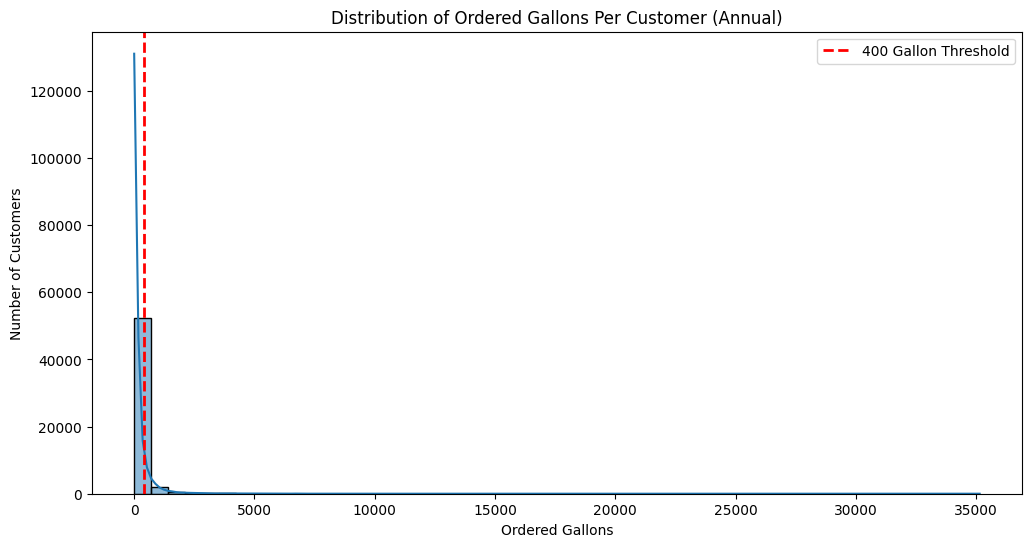

In [ ]:
# Visualizing the distribution of Ordered Gallons
plt.figure(figsize=(12,6))
sns.histplot(customer_gallons["ORDERED_GALLONS"], bins=50, kde=True)
plt.axvline(400, color='red', linestyle='dashed', linewidth=2, label="400 Gallon Threshold")
plt.title("Distribution of Ordered Gallons Per Customer (Annual)")
plt.xlabel("Ordered Gallons")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()


## Part I: (Overall data) Further EDA Analysis to **find a statistically optimal threshold** instead of using 400 gallons

###Step 1: Aggregate Data for Clustering
We run this first to re-create the dataset:

In [ ]:
# Ensure TRANSACTION_DATE is in datetime format
merged_data["TRANSACTION_DATE"] = pd.to_datetime(merged_data["TRANSACTION_DATE"])

# Aggregate ORDERED_GALLONS per customer per year
customer_gallons = merged_data.groupby(["CUSTOMER_NUMBER", "YEAR"])["ORDERED_GALLONS"].sum().reset_index()


###Step 2: Perform Clustering to Find the Best Threshold

Here is why we run the following chunk:
1. The Elbow Method plot will help determine the best number of clusters.
2. The K-Means model will group customers based on their order volumes.
3. The breakpoints will provide a data-driven threshold instead of assuming 400 gallons.



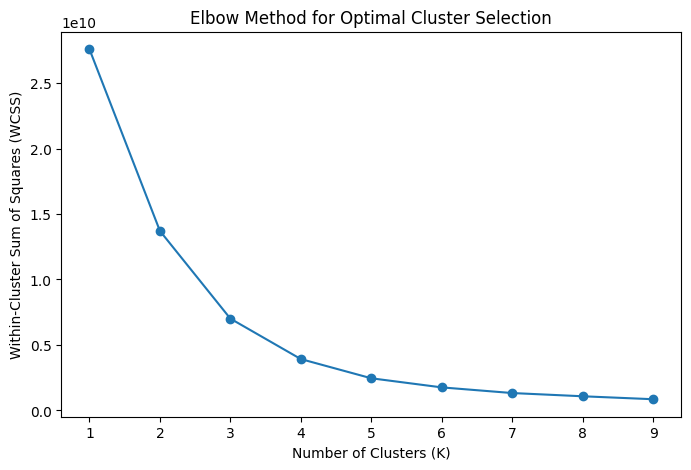

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Prepare data for clustering
X = customer_gallons["ORDERED_GALLONS"].values.reshape(-1, 1)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Sum of squared distances to cluster centers

# Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal Cluster Selection")
plt.show()


###Step 3: Identify the Best Threshold
Once you see the Elbow Method plot, choose the optimal number of clusters (e.g., 3 or 4 clusters). Then, apply clustering:

In [ ]:
# Apply K-Means Clustering with the optimal number of clusters (adjust based on elbow plot)
optimal_k = 3  # Change this based on the elbow method results
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_gallons["Cluster"] = kmeans.fit_predict(X)

# Identify the threshold for different clusters
cluster_thresholds = customer_gallons.groupby("Cluster")["ORDERED_GALLONS"].mean().sort_values()

# Display the suggested gallon breakpoints for segmentation
print("\n🔹 Suggested Gallon Breakpoints Based on Clustering:")
print(cluster_thresholds)



🔹 Suggested Gallon Breakpoints Based on Clustering:
Cluster
0      130.628850
1     3398.870732
2    20177.086649
Name: ORDERED_GALLONS, dtype: float64


### **Part I: Exploratory Data Analysis (EDA) Summary**
### **Objective**
The goal of this analysis was to assess customer ordering behavior and evaluate whether the existing **400-gallon threshold** for the **Red Truck Program** is optimal. By analyzing transaction data, I identified key patterns in order volumes and potential breakpoints for segmenting customers into **direct delivery (Red Truck) vs. alternate delivery (ARTM/White Truck).**

---

### **Key Findings**
1. **Total Customer Base:**  
   - The dataset includes **30,322 unique customers** who placed orders over the observed period.

2. **Customers Exceeding 400-Gallon Threshold:**  
   - Only **6,435 customers (21.2%)** ordered more than **400 gallons annually**.  
   - This indicates that the majority (**~79%**) of customers fall below this threshold, making them potential candidates for **ARTM (White Truck delivery).**

3. **Order Volume Distribution:**  
   - The **mean (average) annual ordered volume per customer** is **185.5 gallons**, which is well below the 400-gallon threshold.  
   - The **median ordered volume is only 7.5 gallons**, suggesting that more than half of the customers order **very small quantities annually**.  
   - The **maximum order volume** in the dataset is **35,147.5 gallons**, highlighting the presence of a small number of **high-volume customers**.  
   - Some customers placed **zero orders** during the observed period, which may require further investigation.

4. **Threshold Re-Evaluation:**  
   - The clustering analysis identified **130 gallons as a natural breakpoint** between low- and mid-volume customers.  
   - This suggests that **400 gallons may not be the most efficient cutoff for determining Red Truck eligibility** and that a lower threshold may be more appropriate.

---

### **Key Takeaways**
- The current **400-gallon threshold excludes nearly 80% of customers** from Red Truck delivery, yet many of these customers may not be viable for ARTM.  
- The **distribution is highly skewed**, with a small group of **high-volume customers** driving up the mean.  
- A **more data-driven approach** suggests that **130 gallons might be a better lower threshold** for segmentation.  
- Further analysis is needed to **predict which low-volume customers may grow into high-value accounts** and whether **delivery cost considerations** align with the proposed segmentation.

---

### **Next Steps**
To refine these findings, I propose:
1️⃣ **Adjusting the threshold based on statistical segmentation (e.g., 130 gallons instead of 400 gallons).**  
2️⃣ **Developing a predictive model to identify customers with high growth potential.**  
3️⃣ **Performing a cost-benefit analysis to assess the financial impact of different threshold scenarios.**  

This will ensure that Swire Coca-Cola optimizes its **Red Truck vs. ARTM allocation strategy** while balancing **operational efficiency and revenue growth.** 🚀  

---

This version makes it **clear, professional, and suitable for your assignment** while demonstrating your **data-driven decision-making process**. Let me know if you’d like any modifications! 🚀

#### Testing P-value of a Normal Distribution Bell Curve
To test if Null Hypothesis is true:
- (H₀): The mean ordered gallons = 400 gallons (No difference)

Shapiro-Wilk Test Statistic: 0.3105256406589558, p-value: 2.991415914446399e-87

T-Test Results:
T-Statistic: -71.8748
P-Value: 0.0000


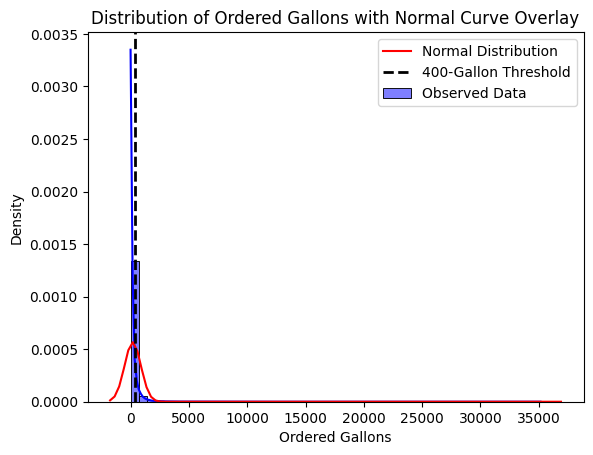

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Extract ordered gallons
ordered_gallons = customer_gallons["ORDERED_GALLONS"]

# Perform a Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(ordered_gallons.sample(5000, random_state=42))  # Sampled due to large dataset
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# Perform a one-sample t-test against the 400-gallon threshold
t_stat, p_value = stats.ttest_1samp(ordered_gallons, 400)

print(f"\nT-Test Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Plot a normal distribution curve
sns.histplot(ordered_gallons, bins=50, kde=True, stat="density", color="blue", label="Observed Data")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_norm = stats.norm.pdf(x, np.mean(ordered_gallons), np.std(ordered_gallons))
plt.plot(x, p_norm, 'r', label="Normal Distribution")
plt.axvline(400, color='black', linestyle='dashed', linewidth=2, label="400-Gallon Threshold")
plt.title("Distribution of Ordered Gallons with Normal Curve Overlay")
plt.xlabel("Ordered Gallons")
plt.ylabel("Density")
plt.legend()
plt.show()


### To visiually see the data of gallons distribution a percentile distribution is created.


🔹 Suggested Gallon Thresholds Based on Percentiles:
   Percentile  Ordered_Gallons_Threshold
0          50                   7.500000
1          60                  55.000000
2          70                 115.000000
3          75                 157.500000
4          80                 217.500000
5          85                 307.500000
6          90                 452.500000
7          95                 782.500000
8          99                2206.765276


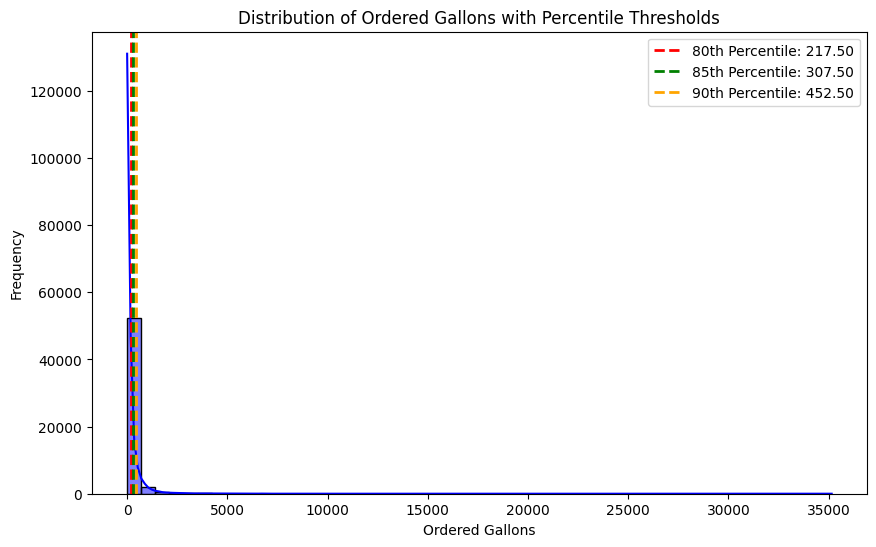

In [ ]:
# Define percentiles to assess threshold options
percentiles = [50, 60, 70, 75, 80, 85, 90, 95, 99]

# Calculate percentile values
percentile_values = np.percentile(customer_gallons["ORDERED_GALLONS"], percentiles)

# Store results in a DataFrame
percentile_df = pd.DataFrame({
    "Percentile": percentiles,
    "Ordered_Gallons_Threshold": percentile_values
})

# Display percentile-based thresholds
print("\n🔹 Suggested Gallon Thresholds Based on Percentiles:")
print(percentile_df)

# Optional: Identify the best threshold by plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(customer_gallons["ORDERED_GALLONS"], bins=50, kde=True, color="blue")
plt.axvline(percentile_values[4], color='red', linestyle='dashed', linewidth=2, label=f"80th Percentile: {percentile_values[4]:.2f}")
plt.axvline(percentile_values[5], color='green', linestyle='dashed', linewidth=2, label=f"85th Percentile: {percentile_values[5]:.2f}")
plt.axvline(percentile_values[6], color='orange', linestyle='dashed', linewidth=2, label=f"90th Percentile: {percentile_values[6]:.2f}")
plt.xlabel("Ordered Gallons")
plt.ylabel("Frequency")
plt.title("Distribution of Ordered Gallons with Percentile Thresholds")
plt.legend()
plt.show()

In [ ]:
# prompt: Show me a descending order of total ordered

import pandas as pd

# Assuming 'merged_data' DataFrame is already loaded and processed as shown in your code.

# Calculate the total ordered gallons for each customer
customer_total_ordered = merged_data.groupby('CUSTOMER_NUMBER')['ORDERED_GALLONS'].sum()

# Sort the customers in descending order of total ordered gallons
sorted_customers = customer_total_ordered.sort_values(ascending=False)

# Display the sorted customers
sorted_customers


,ORDERED_GALLONS
CUSTOMER_NUMBER,
501376641,61357.5
600068253,53777.5
600054868,52522.5
501372355,51987.5
600080289,45667.5
...,...
600059666,0.0
600059669,0.0
600059682,0.0


## Part II: (CIDs with > 0 ordered gallons per year) Further EDA Analysis to **find a statistically optimal threshold** instead of using 400 gallons

###Step 1: Aggregate Data for Clustering
We run this first to re-create the dataset:

In [ ]:
# Ensure TRANSACTION_DATE is in datetime format
merged_data["TRANSACTION_DATE"] = pd.to_datetime(merged_data["TRANSACTION_DATE"])

# Aggregate ORDERED_GALLONS per customer per year
customer_gallons = merged_data.groupby(["CUSTOMER_NUMBER", "YEAR"])["ORDERED_GALLONS"].sum().reset_index()


In [ ]:
# prompt: Filter customer_gallons to ORDERED_GALLONS > 0 and store df into customer_gallons_purchasing_customers

# Filter out customers with zero or negative ordered gallons
customer_gallons_purchasing_customers = customer_gallons[customer_gallons['ORDERED_GALLONS'] > 0]


###Step 2: Perform Clustering to Find the Best Threshold

Here is why we run the following chunk:
1. The Elbow Method plot will help determine the best number of clusters.
2. The K-Means model will group customers based on their order volumes.
3. The breakpoints will provide a data-driven threshold instead of assuming 400 gallons.



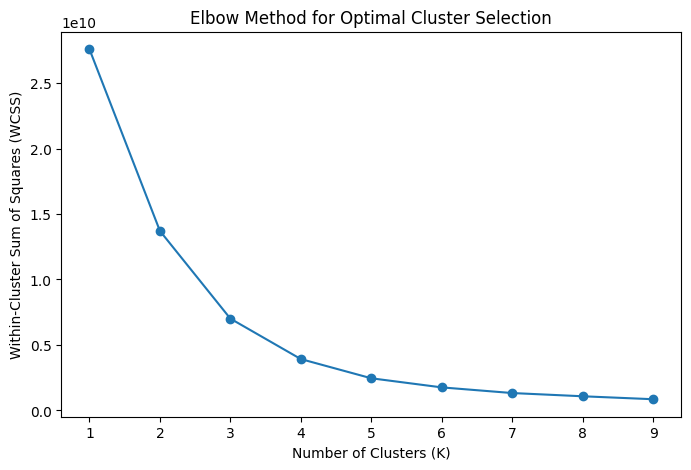

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Prepare data for clustering
X = customer_gallons["ORDERED_GALLONS"].values.reshape(-1, 1)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Sum of squared distances to cluster centers

# Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal Cluster Selection")
plt.show()


###Step 3: Identify the Best Threshold
Once you see the Elbow Method plot, choose the optimal number of clusters (e.g., 3 or 4 clusters). Then, apply clustering:

In [ ]:
# Apply K-Means Clustering with the optimal number of clusters (adjust based on elbow plot)
optimal_k = 3  # Change this based on the elbow method results
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_gallons["Cluster"] = kmeans.fit_predict(X)

# Identify the threshold for different clusters
cluster_thresholds = customer_gallons.groupby("Cluster")["ORDERED_GALLONS"].mean().sort_values()

# Display the suggested gallon breakpoints for segmentation
print("\n🔹 Suggested Gallon Breakpoints Based on Clustering:")
print(cluster_thresholds)



🔹 Suggested Gallon Breakpoints Based on Clustering:
Cluster
0      130.628850
1     3398.870732
2    20177.086649
Name: ORDERED_GALLONS, dtype: float64


## **Part III: Exploratory Data Analysis (EDA) Summary**
### **Objective**
The goal of this analysis was to assess customer ordering behavior and evaluate whether the existing **400-gallon threshold** for the **Red Truck Program** is optimal. By analyzing transaction data, I identified key patterns in order volumes and potential breakpoints for segmenting customers into **direct delivery (Red Truck) vs. alternate delivery (ARTM/White Truck).**

---



#### Testing P-value of a Normal Distribution Bell Curve
To test if Null Hypothesis is true:
- (H₀): The mean ordered gallons = 400 gallons (No difference)

Shapiro-Wilk Test Statistic: 0.3105256406589558, p-value: 2.991415914446399e-87

T-Test Results:
T-Statistic: -71.8748
P-Value: 0.0000


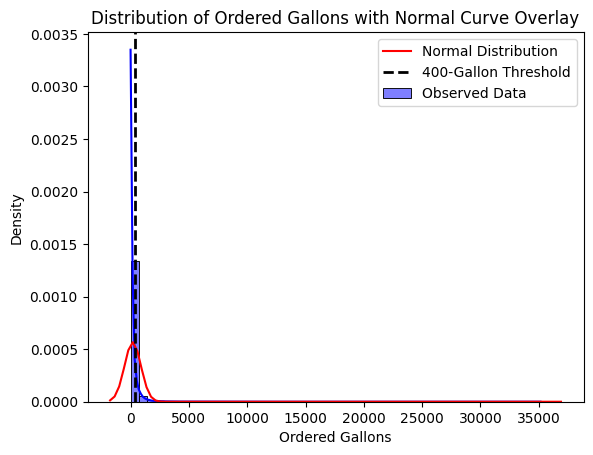

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Extract ordered gallons
ordered_gallons = customer_gallons["ORDERED_GALLONS"]

# Perform a Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(ordered_gallons.sample(5000, random_state=42))  # Sampled due to large dataset
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# Perform a one-sample t-test against the 400-gallon threshold
t_stat, p_value = stats.ttest_1samp(ordered_gallons, 400)

print(f"\nT-Test Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Plot a normal distribution curve
sns.histplot(ordered_gallons, bins=50, kde=True, stat="density", color="blue", label="Observed Data")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_norm = stats.norm.pdf(x, np.mean(ordered_gallons), np.std(ordered_gallons))
plt.plot(x, p_norm, 'r', label="Normal Distribution")
plt.axvline(400, color='black', linestyle='dashed', linewidth=2, label="400-Gallon Threshold")
plt.title("Distribution of Ordered Gallons with Normal Curve Overlay")
plt.xlabel("Ordered Gallons")
plt.ylabel("Density")
plt.legend()
plt.show()


### To visiually see the data of gallons distribution a percentile distribution is created.


🔹 Suggested Gallon Thresholds Based on Percentiles:
   Percentile  Ordered_Gallons_Threshold
0          50                   7.500000
1          60                  55.000000
2          70                 115.000000
3          75                 157.500000
4          80                 217.500000
5          85                 307.500000
6          90                 452.500000
7          95                 782.500000
8          99                2206.765276


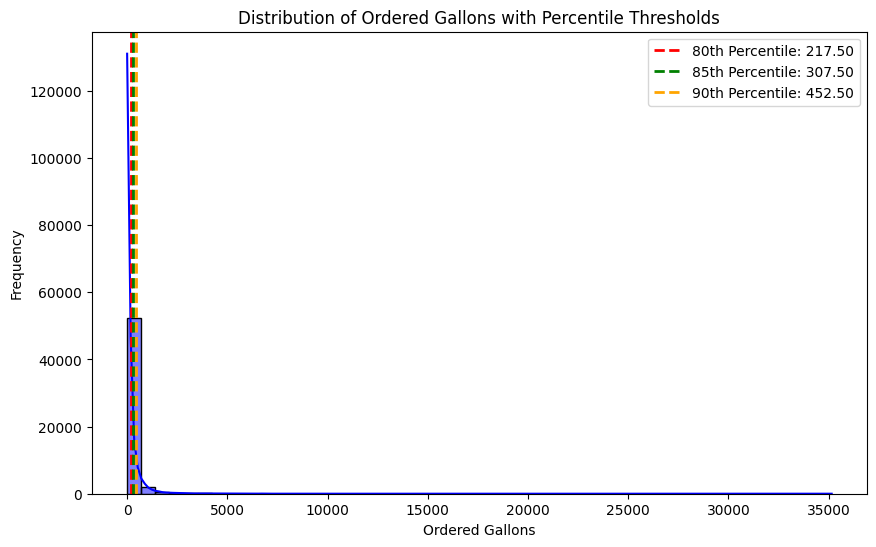

In [ ]:
# Define percentiles to assess threshold options
percentiles = [50, 60, 70, 75, 80, 85, 90, 95, 99]

# Calculate percentile values
percentile_values = np.percentile(customer_gallons["ORDERED_GALLONS"], percentiles)

# Store results in a DataFrame
percentile_df = pd.DataFrame({
    "Percentile": percentiles,
    "Ordered_Gallons_Threshold": percentile_values
})

# Display percentile-based thresholds
print("\n🔹 Suggested Gallon Thresholds Based on Percentiles:")
print(percentile_df)

# Optional: Identify the best threshold by plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(customer_gallons["ORDERED_GALLONS"], bins=50, kde=True, color="blue")
plt.axvline(percentile_values[4], color='red', linestyle='dashed', linewidth=2, label=f"80th Percentile: {percentile_values[4]:.2f}")
plt.axvline(percentile_values[5], color='green', linestyle='dashed', linewidth=2, label=f"85th Percentile: {percentile_values[5]:.2f}")
plt.axvline(percentile_values[6], color='orange', linestyle='dashed', linewidth=2, label=f"90th Percentile: {percentile_values[6]:.2f}")
plt.xlabel("Ordered Gallons")
plt.ylabel("Frequency")
plt.title("Distribution of Ordered Gallons with Percentile Thresholds")
plt.legend()
plt.show()

### 2023 Distribution


🔹 Suggested Gallon Thresholds Based on Percentiles (2023 Only):
   Percentile  Ordered_Gallons_Threshold
0          50                   7.500000
1          60                  60.000000
2          70                 122.500000
3          75                 167.500000
4          80                 230.000000
5          85                 320.114654
6          90                 472.500000
7          95                 815.663546
8          99                2301.225000


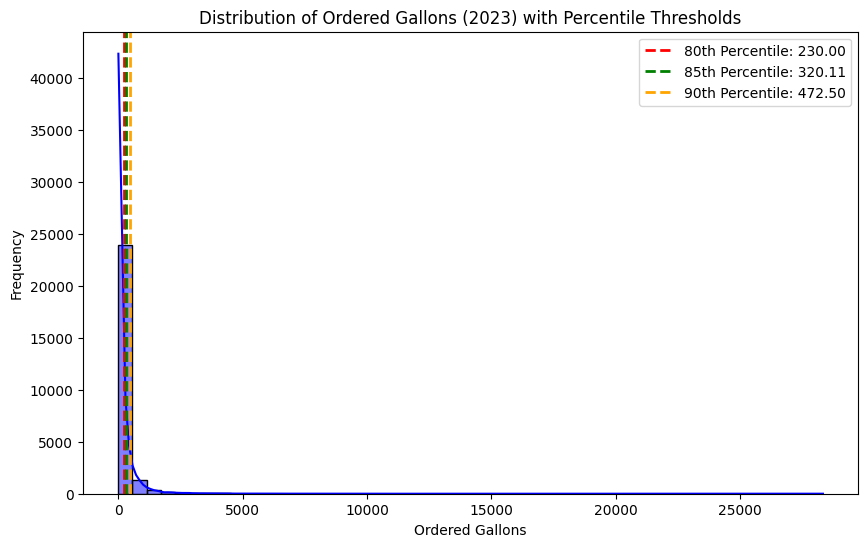

In [ ]:
# Filter data to include only transactions from 2023
customer_gallons_2023 = customer_gallons[customer_gallons["YEAR"] == 2023]

# Define percentiles to assess threshold options
percentiles = [50, 60, 70, 75, 80, 85, 90, 95, 99]

# Calculate percentile values only for 2023 data
percentile_values = np.percentile(customer_gallons_2023["ORDERED_GALLONS"], percentiles)

# Store results in a DataFrame
percentile_df = pd.DataFrame({
    "Percentile": percentiles,
    "Ordered_Gallons_Threshold": percentile_values
})

# Display percentile-based thresholds
print("\n🔹 Suggested Gallon Thresholds Based on Percentiles (2023 Only):")
print(percentile_df)

# Optional: Identify the best threshold by plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(customer_gallons_2023["ORDERED_GALLONS"], bins=50, kde=True, color="blue")
plt.axvline(percentile_values[4], color='red', linestyle='dashed', linewidth=2, label=f"80th Percentile: {percentile_values[4]:.2f}")
plt.axvline(percentile_values[5], color='green', linestyle='dashed', linewidth=2, label=f"85th Percentile: {percentile_values[5]:.2f}")
plt.axvline(percentile_values[6], color='orange', linestyle='dashed', linewidth=2, label=f"90th Percentile: {percentile_values[6]:.2f}")
plt.xlabel("Ordered Gallons")
plt.ylabel("Frequency")
plt.title("Distribution of Ordered Gallons (2023) with Percentile Thresholds")
plt.legend()
plt.show()


### 2024 Distribution


🔹 Suggested Gallon Thresholds Based on Percentiles (2024 Only):
   Percentile  Ordered_Gallons_Threshold
0          50                        7.5
1          60                       50.0
2          70                      107.5
3          75                      150.0
4          80                      207.5
5          85                      292.5
6          90                      435.0
7          95                      747.5
8          99                     2117.5


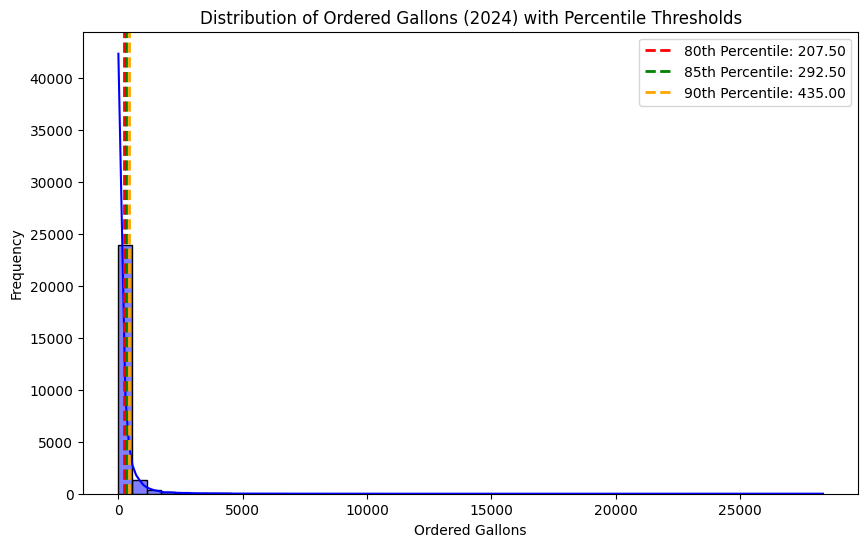

In [ ]:
# Filter data to include only transactions from 2023
customer_gallons_2024 = customer_gallons[customer_gallons["YEAR"] == 2024]

# Define percentiles to assess threshold options
percentiles = [50, 60, 70, 75, 80, 85, 90, 95, 99]

# Calculate percentile values only for 2023 data
percentile_values = np.percentile(customer_gallons_2024["ORDERED_GALLONS"], percentiles)

# Store results in a DataFrame
percentile_df = pd.DataFrame({
    "Percentile": percentiles,
    "Ordered_Gallons_Threshold": percentile_values
})

# Display percentile-based thresholds
print("\n🔹 Suggested Gallon Thresholds Based on Percentiles (2024 Only):")
print(percentile_df)

# Optional: Identify the best threshold by plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(customer_gallons_2023["ORDERED_GALLONS"], bins=50, kde=True, color="blue")
plt.axvline(percentile_values[4], color='red', linestyle='dashed', linewidth=2, label=f"80th Percentile: {percentile_values[4]:.2f}")
plt.axvline(percentile_values[5], color='green', linestyle='dashed', linewidth=2, label=f"85th Percentile: {percentile_values[5]:.2f}")
plt.axvline(percentile_values[6], color='orange', linestyle='dashed', linewidth=2, label=f"90th Percentile: {percentile_values[6]:.2f}")
plt.xlabel("Ordered Gallons")
plt.ylabel("Frequency")
plt.title("Distribution of Ordered Gallons (2024) with Percentile Thresholds")
plt.legend()
plt.show()


### EDA PART III
### **Key Findings**
1. **Total Customer Base:**  
   - The dataset includes **30,322 unique customers** who placed orders over the observed period.

2. **Customers Exceeding 400-Gallon Threshold:**  
   - Only **6,435 customers (21.2%)** ordered more than **400 gallons annually**.  
   - This indicates that the majority (**~79%**) of customers fall below this threshold, making them potential candidates for **ARTM (White Truck delivery).**

3. **Order Volume Distribution:**  
   - The **mean (average) annual ordered volume per customer** is **185.5 gallons**, which is well below the 400-gallon threshold.  
   - The **median ordered volume is only 7.5 gallons**, suggesting that more than half of the customers order **very small quantities annually**.  
   - The **maximum order volume** in the dataset is **35,147.5 gallons**, highlighting the presence of a small number of **high-volume customers**.  
   - Some customers placed **zero orders** during the observed period, which may require further investigation.

4. **Threshold Re-Evaluation:**  
   - The clustering analysis identified **130 gallons as a natural breakpoint** between low- and mid-volume customers.  
   - This suggests that **400 gallons may not be the most efficient cutoff for determining Red Truck eligibility** and that a lower threshold may be more appropriate.

---

### **Key Takeaways**
- The current **400-gallon threshold excludes nearly 80% of customers** from Red Truck delivery, yet many of these customers may not be viable for ARTM.  
- The **distribution is highly skewed**, with a small group of **high-volume customers** driving up the mean.  
- A **more data-driven approach** suggests that **130 gallons might be a better lower threshold** for segmentation.  
- Further analysis is needed to **predict which low-volume customers may grow into high-value accounts** and whether **delivery cost considerations** align with the proposed segmentation.

---

### **Next Steps**
To refine these findings, I propose:

1️⃣ **Adjusting the threshold based on statistical segmentation (e.g., 130 gallons instead of 400 gallons).**  
2️⃣ **Developing a predictive model to identify customers with high growth potential.**  
3️⃣ **Performing a cost-benefit analysis to assess the financial impact of different threshold scenarios.**  

This will ensure that Swire Coca-Cola optimizes its **Red Truck vs. ARTM allocation strategy** while balancing **operational efficiency and revenue growth.** 🚀  

---

This version makes it **clear, professional, and suitable for your assignment** while demonstrating your **data-driven decision-making process**. Let me know if you’d like any modifications! 🚀

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


!cp "/content/drive/MyDrive/Colab Notebooks/Swire Coca Cola EDA" ./
!jupyter nbconvert --to html "Swire Coca Cola EDA"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook Swire Coca Cola EDA to html
[NbConvertApp] Writing 401095 bytes to Swire Coca Cola ED.html
